In [2]:
!pip install gensim


  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 37.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 56.8 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 40.7 MB/s eta 0:00:00a 0:00:01
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3


In [3]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [4]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['bird']

# Getting the most similar words

print(model.most_similar('bird'))

# Getting the similarity between two words

print(model.similarity('bird', 'fish'))


[('flu', 0.7880803942680359), ('birds', 0.7743473649024963), ('avian', 0.7533144354820251), ('h5n1', 0.7267215847969055), ('virus', 0.7177333235740662), ('influenza', 0.7053558230400085), ('swine', 0.6881208419799805), ('outbreaks', 0.6694715023040771), ('outbreak', 0.6584559082984924), ('animal', 0.6503939032554626)]
0.5992557


Part 1a

In [93]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

I think this result makes a lot of sense. Rather than associating “bird” with only natural or animal-related concepts, the word embedding captures a contextual association—specifically the widespread use of the term “bird flu” (avian flu) in digital text corpora. Words like "flu", "avian", "h5n1", and "virus" reflect how often “bird” appears in discussions about epidemics.

The results emphasize that word embeddings reflect co-occurrence patterns in the training corpus, not literal or taxonomical relationships. This means that public discourse (e.g., media coverage of avian flu outbreaks) directly shapes how embeddings represent meaning.

In [6]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["beijing"]-model['china']

jap_capital=model["japan"]+capital

print(model.most_similar(jap_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["fishes"]-model["fish"]

print(model.most_similar(plural))

#we can also add vectors together
plural_birds=model["bird"]+plural

print(model.most_similar(plural_birds))



[('japan', 0.8293775320053101), ('tokyo', 0.8239815831184387), ('seoul', 0.7331962585449219), ('beijing', 0.7091279029846191), ('japanese', 0.7078492641448975), ('osaka', 0.6650106310844421), ('korea', 0.6439840793609619), ('pyongyang', 0.6310620903968811), ('moscow', 0.6024987101554871), ('koizumi', 0.5913465619087219)]
[('thérouanne', 0.5425756573677063), ('therapsids', 0.5251472592353821), ('karka', 0.5234781503677368), ('afrotheria', 0.5166732668876648), ('datatypes', 0.5130883455276489), ('thespiae', 0.5098586082458496), ('chordates', 0.5091235041618347), ('upbuilding', 0.5070019364356995), ('saint-martin-de-ré', 0.5058272480964661), ('busra', 0.5053247809410095)]
[('bird', 0.638987123966217), ('primates', 0.5882152318954468), ('enantiornithine', 0.5702542066574097), ('birds', 0.5668566226959229), ('reptiles', 0.5664254426956177), ('mammals', 0.562901496887207), ('mammal', 0.5571029186248779), ('avian', 0.555425226688385), ('flightless', 0.5128504633903503), ('amphibians', 0.51259

In [8]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["chef"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('chef', 0.8560176491737366),
 ('chefs', 0.6985182762145996),
 ('restaurateur', 0.6437274813652039),
 ('waitress', 0.6355381011962891),
 ('restaurant', 0.6125046610832214),
 ('hairdresser', 0.5781832337379456),
 ('culinary', 0.5758862495422363),
 ('cuisine', 0.5737881064414978),
 ('cookbook', 0.5681759119033813),
 ('gourmet', 0.5589925050735474)]

Part 1b

In [ ]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document

Adding the gender vector (woman - man) to "chef" brings up words like "waitress" and "hairdresser"—terms commonly associated with traditionally female-occupied roles or stereotypes. This reflects a gender bias in the model, where the addition of “femininity” leads to gendered or feminized job roles and associations.

The embedding space encodes gendered assumptions—showing that word embeddings not only reflect linguistic data but also societal biases embedded in that data. These biases could influence downstream NLP applications in problematic ways unless addressed.

Most interesting dimension to share:
The gender vector is one of the clearest and most insightful dimensions in word embeddings—it both reveals and perpetuates cultural assumptions. It’s a compelling example of how “math” can reflect social realities.

Part 2: Visualization and Embeddings in Space

In [10]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 52.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


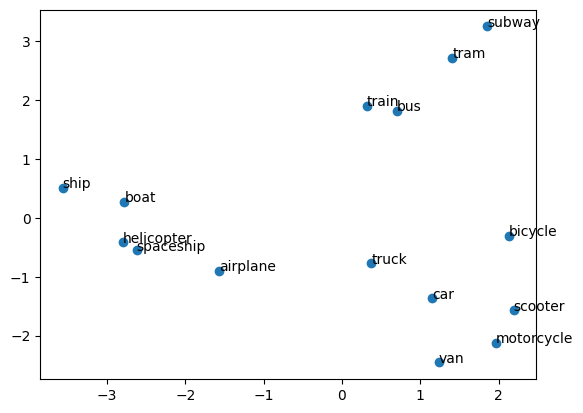

In [11]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["car", "truck", "motorcycle", "bicycle", "bus", "van", "train", "subway", "tram", "airplane", "helicopter", "boat", "ship", "scooter", "spaceship"]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

In [ ]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

It make sense since they seem follow following patterns:
1. Grouped clusters by transport type:
  Public transportation terms like “subway”, “tram”, “train”, and “bus” are close together in the upper right quadrant, suggesting that the word embeddings capture their shared function.
  Small personal vehicles such as “car”, “scooter”, “motorcycle”, “van”, and “truck” are clustered in the lower right quadrant, showing their similarity in usage or road-based functionality.
  Air and water vehicles like “helicopter”, “airplane”, “spaceship”, “ship”, and “boat” are on the left side of the plot, which fits their shared mode of travel (air or water).
2. Interesting relationships:
  “Spaceship” and “airplane” being near “helicopter” and “boat” suggests that the model might see all as non-ground vehicles or grouped due to context (e.g., travel or navigation).
  “Motorcycle” and “scooter” being very close makes sense due to their physical similarity and common usage.

The PCA result reflects meaningful groupings that align with our real-world understanding of these vehicles, showing that word embeddings can capture semantic similarity—even for non-human concepts like vehicles. This validates the embeddings’ internal logic, and such visualization is helpful in detecting patterns or outliers.

[==================================================] 100.0% 387.1/387.1MB downloaded


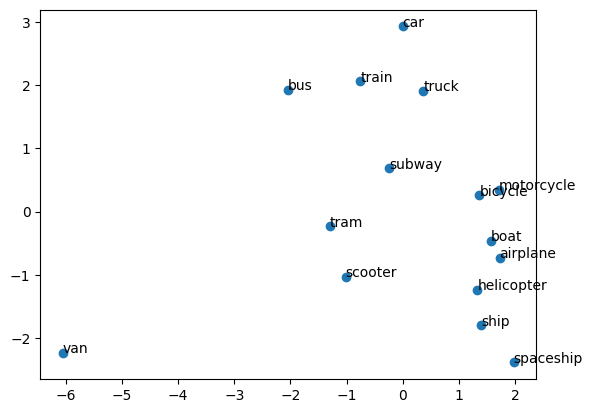

In [12]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")

words = ["car", "truck", "motorcycle", "bicycle", "bus", "van", "train", 
         "subway", "tram", "airplane", "helicopter", "boat", "ship", 
         "scooter", "spaceship"]

X = [twitter_model[word] for word in words]

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1])
for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0], X_pca[i,1]))
plt.show()

What has changed in the embedding space:
	The distribution is less clustered by type compared to the Wikipedia-based embeddings.
	Words like “spaceship” and “van” are isolated on opposite ends, showing greater semantic drift.
	“Car”, “truck”, and “train” still group loosely, but “motorcycle” and “bicycle” are now close to “boat” and “airplane”, which feels less logical by physical characteristics.
	The air/sea vehicles like “boat”, “airplane”, “helicopter”, and “ship” don’t form a tight group—they’re more scattered.
	There’s less clear thematic structure, unlike the previous plot where categories (ground, air, sea) were more distinguishable.

Why did this happen:
	This model is trained on Twitter, a platform where word usage is informal, metaphorical, and trend-driven.
	E.g., people might casually refer to “van” in jokes or idioms (“creepy van”) that shift its semantic position.
	“Spaceship” is used metaphorically more than literally (“My brain left in a spaceship”), pushing it away from transportation terms.
	Twitter text often lacks technical or encyclopedic precision, so relationships between terms like “tram” and “bus” are weaker.
	In contrast, the Wikipedia model embeds words based on factual, context-rich usage, making its vector space more semantically structured.

As a conclusion the Twitter GloVe embedding space reflects how people talk about vehicles, not how vehicles are related in reality. This explains the unusual proximities and why some logical clusters break down.

Part 3: Embedding reddit posts

In [14]:
!pip3 install pandas
import pandas as pd


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [15]:
#read in uiuc csv
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [16]:
#using the code from project 1, clean the text and create a bag of words representation of the text
def clean(text):
    text = ' '.join(text.split())  # Remove newline and extra spaces
    text = text.lower()  # Convert to lowercase
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])  # Remove punctuation
    return text

In [17]:
mich['cleaned_text'] = mich['text'].apply(clean)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(mich['cleaned_text'])

In [ ]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

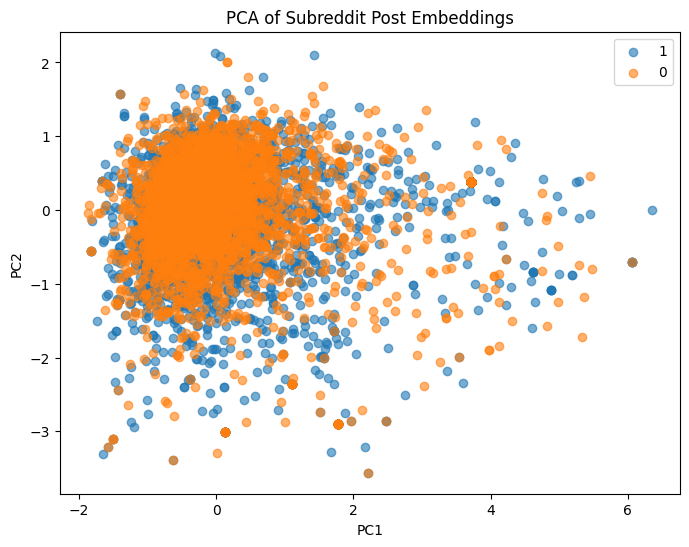

In [22]:
import numpy as np

model = gensim.downloader.load("glove-wiki-gigaword-100")

# Combine uiuc and mich DataFrames into subreddits
subreddits = pd.concat([uiuc, mich])

def get_avg_vector(text):
    words = text.lower().split()
    valid_words = [word for word in words if word in model]
    if not valid_words:
        return np.zeros(model.vector_size)
    return np.mean([model[word] for word in valid_words], axis=0)

subreddits["embedding"] = subreddits["text"].apply(get_avg_vector)

X = np.vstack(subreddits["embedding"].values)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

labels = subreddits["label"].unique()
colors = ['red', 'blue']
label_map = {label: colors[i] for i, label in enumerate(labels)}

plt.figure(figsize=(8, 6))
for label in labels:
    idx = subreddits["label"] == label
    plt.scatter(X_pca[idx, 0], X_pca[idx, 1], label=label, alpha=0.6)

plt.legend()
plt.title("PCA of Subreddit Post Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

It seems like there isn't a clear separation between the two columns. Beacuse based on the PCA plot of subreddit post embeddings, there is no clear separation between the two classes (labeled 0 and 1). The points representing the two labels are heavily intermixed in the 2D space, forming a large overlapping cluster around the origin.

I think this might due to: 
Vocabulary overlap between the subreddits.
Loss of contextual nuance when averaging word vectors.
The limitations of PCA, which only captures linear separability in two dimensions.

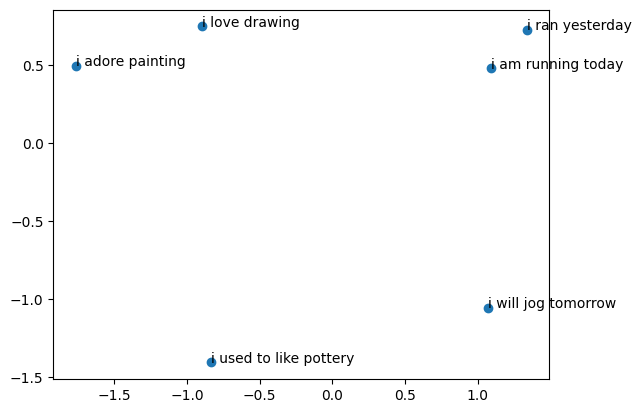

In [23]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

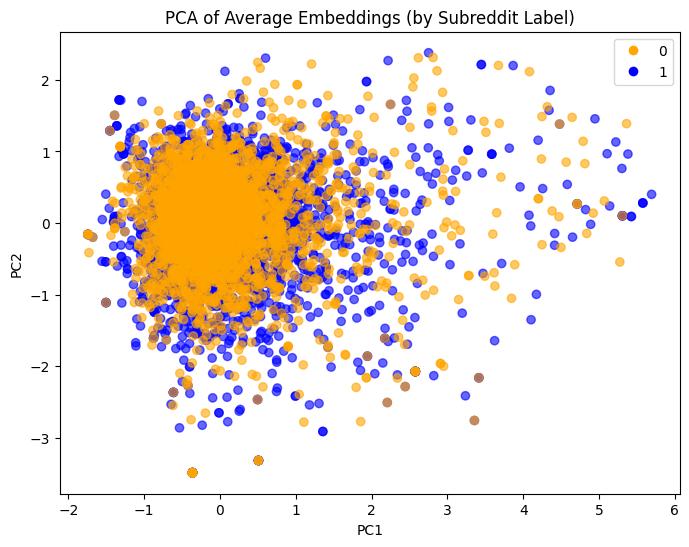

In [24]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.nan

subreddits["avg_embed"] = subreddits["text"].apply(lambda x: avg_embedding(x, model))

subreddits = subreddits.dropna(subset=["avg_embed"]).reset_index(drop=True)

embedding_matrix = np.stack(subreddits["avg_embed"].values)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(embedding_matrix)

plt.figure(figsize=(8, 6))
colors = ['orange' if label == 0 else 'blue' for label in subreddits["label"]]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Average Embeddings (by Subreddit Label)")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='0', markerfacecolor='orange', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='1', markerfacecolor='blue', markersize=8)
])
plt.show()

In [ ]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

How is this plot different from the previous one:

Compared to the earlier PCA plot of raw word embeddings or bag-of-words representations, this one uses average GloVe embeddings per post. That means each point represents the semantic average of all words in a post, rather than high-dimensional sparse features or individual word vectors. This generally smooths out noise and captures more nuanced semantics from posts.

However, I still can't tell a obvious differece compaere to last plot.

Is there clear separation:

No, there is still no clear separation between the two subreddit labels.

Part 4: HuggingFace and BERT

In [26]:
!pip install transformers


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [27]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


Device set to use mps:0


In [28]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

from collections import Counter

pipe = pipeline("text-classification", 
                model="finiteautomata/bertweet-base-sentiment-analysis", 
                tokenizer="finiteautomata/bertweet-base-sentiment-analysis", 
                truncation=True)

sentiment_labels = []

for post in subreddits["text"]:
    try:
        result = pipe(post)
        sentiment_labels.append(result[0]['label'])
    except Exception as e:
        print(f"Error processing post: {e}")
        continue

label_counts = Counter(sentiment_labels)
most_common = label_counts.most_common(1)[0]
print(f"The most common sentiment is: {most_common[0]} with {most_common[1]} occurrences")

Device set to use mps:0


The most common sentiment is: NEU with 4561 occurrences


In [31]:
for i in range(10):
    post = subreddits["text"].iloc[i]
    label = pipe(post)[0]['label']
    print(f"\nPost: {post}\nPredicted Sentiment: {label}")

uiuc_sentiments = [pipe(post)[0]['label'] for post in subreddits[subreddits["label"] == 1]["text"]]
umich_sentiments = [pipe(post)[0]['label'] for post in subreddits[subreddits["label"] == 0]["text"]]

from collections import Counter
print("UIUC Sentiment:", Counter(uiuc_sentiments))
print("UMich Sentiment:", Counter(umich_sentiments))


Post: Have the same professor! And in lecture he did say we were gonna have to learn some of the stuff ourself 

I would recommend using online resources such as Paul’s Online Math Notes and Professor Leonard on YouTube. Personally, I’ve been learning the material from those sources before going to lecture
Predicted Sentiment: NEU

Post: Do you find it helpful to still go to the lecture? It seems to me that his slides are embedded with mistakes here and there. It makes it more confusing for me to understand him.
Predicted Sentiment: NEG

Post: Have you tried emailing University Housing to request access?
Predicted Sentiment: NEU

Post: Purchasing Illini Cash should get you added to the Non-Resident Meal Plan card access level. These **generally** allow you access to whatever is considered the "front door" of the residence hall with access to the dining hall.

At PAR, that would be the doors facing the bus stop on the south side of the building. Only the mag stripe reader will work, pr

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

The sentiment predictions for the ten sample posts generally appear accurate and reasonable. Positive labels were assigned to posts expressing gratitude or optimism, such as “Just did, thanks for the suggestion!” and “On the bright side, no shadow ban,” both of which clearly convey positive sentiment. Neutral posts, including those discussing meal plans or Illini Cash policies, are informative and lack emotional tone, making the NEU label appropriate. The one negative-labeled post expressing confusion about lecture materials also fits well with the NEG category. Overall, I agree with the model’s predictions for all ten examples, as they align with the emotional tone of each post.

In [ ]:
#is the UIUC or Michigan subreddit more negative?

When comparing sentiment distributions between the UIUC and Michigan subreddits, the Michigan subreddit appears slightly more negative. Specifically, UMich has 1,229 negative posts out of 4,440 total, while UIUC has 1,131 out of 4,384. This means the proportion of negative posts is about 27.7% for UMich versus 25.8% for UIUC. While the difference is not dramatic, it does indicate that, on average, posts from the Michigan subreddit carry slightly more negative sentiment than those from UIUC.